# Readability v.2

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import ru_readability_scores
from ru_readability_scores import flesh, smog, coleman_liau, gunning_fog, ari, FRE
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import pymorphy2

In [30]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')

In [31]:
df = pd.read_excel("vozn_sample_clean.xlsx")

In [32]:
df

,path,title,first_line,year,type
0,mozhno_i_ne_byt_poetom.txt,NaN,"Можно и не быть поэтом,",1976.0,text
1,nosorog.txt,НОСОРОГ,Мы познали лишь предбанник.,2008.0,text
2,leto_oligarkha.txt,ЛЕТО ОЛИГАРХА,"Опаловый ""Линкольн""",2003.0,text
3,a_ty_menya_pomnish.txt,А ТЫ МЕНЯ ПОМНИШЬ?,Ты мне прозвонилась сквозь страшную полночь:,1998.0,text
4,liturgija_let.txt,Литургия лет,"«Господь, помилуй меня,",1987.0,text
...,...,...,...,...,...
412,otkrytie_ges.txt,ОТКРЫТИЕ ГЭС,Мы — противники тусклого.,1950.0,text
413,v_gorakh.txt,В ГОРАХ,"Здесь пишется, как дышится, —",1950.0,text
414,zagorskaya_lavra.txt,ЗАГОРСКАЯ ЛАВРА,Сопя носами сизыми,1950.0,text
415,zemlya.txt,ЗЕМЛЯ,Мы любим босыми,1950.0,text


In [33]:
def vozn_read_document_content(file_path):
    file_path = "poems_sample/" + file_path
    with open(file_path, 'r', encoding="utf8") as file:
        content = file.read()
    return content

In [34]:
df['text'] = df['path'].apply(vozn_read_document_content)

In [35]:
df

,path,title,first_line,year,type,text
0,mozhno_i_ne_byt_poetom.txt,NaN,"Можно и не быть поэтом,",1976.0,text,"<&>Можно и не быть поэтом,\nно нельзя терпеть,..."
1,nosorog.txt,НОСОРОГ,Мы познали лишь предбанник.,2008.0,text,<n>НОСОРОГ\n\n<&>Мы познали лишь предбанник.\n...
2,leto_oligarkha.txt,ЛЕТО ОЛИГАРХА,"Опаловый ""Линкольн""",2003.0,text,<n>ЛЕТО ОЛИГАРХА\n<&>Опаловый «Линкольн».\nПол...
3,a_ty_menya_pomnish.txt,А ТЫ МЕНЯ ПОМНИШЬ?,Ты мне прозвонилась сквозь страшную полночь:,1998.0,text,<n>А ТЫ МЕНЯ ПОМНИШЬ?\n\n<&>Ты мне прозвонилас...
4,liturgija_let.txt,Литургия лет,"«Господь, помилуй меня,",1987.0,text,"<n>Литургия лет\n\n<&>«Господь, помилуй меня,\..."
...,...,...,...,...,...,...
412,otkrytie_ges.txt,ОТКРЫТИЕ ГЭС,Мы — противники тусклого.,1950.0,text,<n>ОТКРЫТИЕ ГЭС\n\n<&>Мы — противники тусклого...
413,v_gorakh.txt,В ГОРАХ,"Здесь пишется, как дышится, —",1950.0,text,"<n>В ГОРАХ\n\n<&>Здесь пишется, как дышится, —..."
414,zagorskaya_lavra.txt,ЗАГОРСКАЯ ЛАВРА,Сопя носами сизыми,1950.0,text,<n>ЗАГОРСКАЯ ЛАВРА\n\n<&>Сопя носами сизыми\nИ...
415,zemlya.txt,ЗЕМЛЯ,Мы любим босыми,1950.0,text,<n>ЗЕМЛЯ\n\n<&>Мы любим босыми\nСтупать по зем...


In [36]:
def remove_tags(text):
    clean_text = re.sub('<.*?>', '', text)
    return clean_text

In [37]:
def remove_text_after_tags(text):
    clean_text = re.sub(r'<[^&]>.*?$', '', text, 0, re.MULTILINE)
    return clean_text

In [38]:
df['text'] = df['text'].apply(remove_text_after_tags)

In [39]:
df['text'] = df['text'].apply(remove_tags)

## Readability

In [13]:
df["flesh"] = df['text'].apply(flesh)
df["smog"] = df['text'].apply(smog)
df["coleman_liau"] = df['text'].apply(coleman_liau)
df["ari"] = df['text'].apply(ari)
df["gunning_fog"] = df['text'].apply(gunning_fog) 

In [14]:
df.head()

,path,title,first_line,year,type,text,flesh,smog,coleman_liau,ari,gunning_fog
0,mozhno_i_ne_byt_poetom.txt,NaN,"Можно и не быть поэтом,",1976.0,text,"Можно и не быть поэтом,\nно нельзя терпеть, по...",8.730000,11.208143,5.652000,12.120000,12.000000
1,nosorog.txt,НОСОРОГ,Мы познали лишь предбанник.,2008.0,text,\n\nМы познали лишь предбанник.\nКраток срок.\...,6.243192,11.520995,3.864000,6.411657,13.327674
2,leto_oligarkha.txt,ЛЕТО ОЛИГАРХА,"Опаловый ""Линкольн""",2003.0,text,"\nОпаловый «Линкольн».\nПолмира огуляв,\nскажи...",4.399615,10.214890,3.471795,6.111538,11.000000
3,a_ty_menya_pomnish.txt,А ТЫ МЕНЯ ПОМНИШЬ?,Ты мне прозвонилась сквозь страшную полночь:,1998.0,text,\n\nТы мне прозвонилась сквозь страшную полноч...,4.446852,11.407656,2.042963,6.567333,11.622222
4,liturgija_let.txt,Литургия лет,"«Господь, помилуй меня,",1987.0,text,"\n\n«Господь, помилуй меня,\nГосподь, помилуй ...",4.300367,10.657889,1.822326,5.543383,9.363525


In [15]:
df['mean_readability'] = df[["flesh", "smog", "coleman_liau", "ari", "gunning_fog"]].mean(axis=1)

In [16]:
df

,path,title,first_line,year,type,text,flesh,smog,coleman_liau,ari,gunning_fog,mean_readability
0,mozhno_i_ne_byt_poetom.txt,NaN,"Можно и не быть поэтом,",1976.0,text,"Можно и не быть поэтом,\nно нельзя терпеть, по...",8.730000,11.208143,5.652000,12.120000,12.000000,9.942029
1,nosorog.txt,НОСОРОГ,Мы познали лишь предбанник.,2008.0,text,\n\nМы познали лишь предбанник.\nКраток срок.\...,6.243192,11.520995,3.864000,6.411657,13.327674,8.273504
2,leto_oligarkha.txt,ЛЕТО ОЛИГАРХА,"Опаловый ""Линкольн""",2003.0,text,"\nОпаловый «Линкольн».\nПолмира огуляв,\nскажи...",4.399615,10.214890,3.471795,6.111538,11.000000,7.039568
3,a_ty_menya_pomnish.txt,А ТЫ МЕНЯ ПОМНИШЬ?,Ты мне прозвонилась сквозь страшную полночь:,1998.0,text,\n\nТы мне прозвонилась сквозь страшную полноч...,4.446852,11.407656,2.042963,6.567333,11.622222,7.217405
4,liturgija_let.txt,Литургия лет,"«Господь, помилуй меня,",1987.0,text,"\n\n«Господь, помилуй меня,\nГосподь, помилуй ...",4.300367,10.657889,1.822326,5.543383,9.363525,6.337498
...,...,...,...,...,...,...,...,...,...,...,...,...
412,otkrytie_ges.txt,ОТКРЫТИЕ ГЭС,Мы — противники тусклого.,1950.0,text,\n\nМы — противники тусклого.\nМы приучены к ш...,6.836812,13.205437,4.380870,8.508889,13.458937,9.278189
413,v_gorakh.txt,В ГОРАХ,"Здесь пишется, как дышится, —",1950.0,text,"\n\nЗдесь пишется, как дышится, —\nВзволнованн...",9.339616,16.156166,6.336986,10.516849,19.538630,12.377650
414,zagorskaya_lavra.txt,ЗАГОРСКАЯ ЛАВРА,Сопя носами сизыми,1950.0,text,\n\nСопя носами сизыми\nИ подоткнувши рясы —\n...,6.337021,11.855464,2.327660,8.015887,11.656738,8.038554
415,zemlya.txt,ЗЕМЛЯ,Мы любим босыми,1950.0,text,"\n\nМы любим босыми\nСтупать по земле,\nПо мяг...",4.820999,11.557038,2.914186,8.684928,11.721477,7.939726


Очистим от выбросов

In [17]:
df = df[df.mean_readability < 20]

[Text(0.5, 0, 'Годы образования'),
 Text(0.5, 1.0, 'Среднее количество лет образования, необходимое для понимания текстов А.А.Вознесенского')]

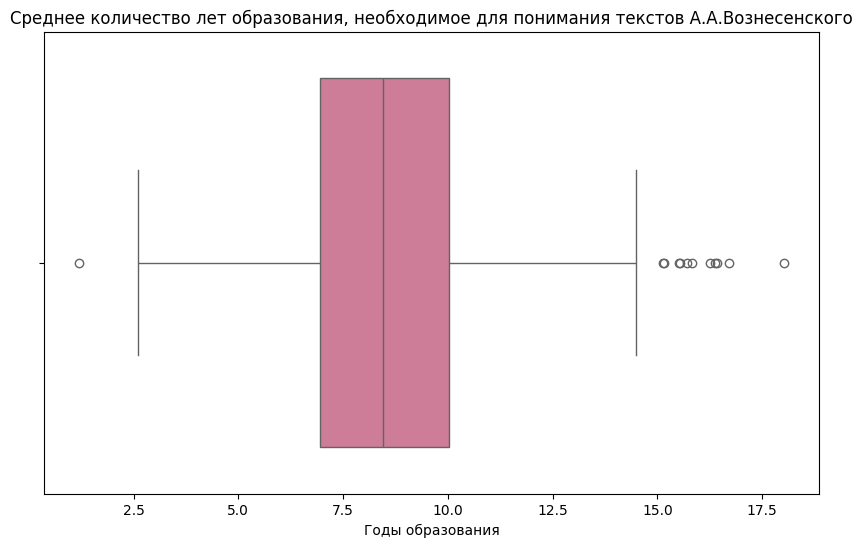

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x = df["mean_readability"], 
    color ='palevioletred').set(
    xlabel ='Годы образования', 
    title = "Среднее количество лет образования, необходимое для понимания текстов А.А.Вознесенского")

In [19]:
df['mean_readability'].mean()

8.648932899359092

In [20]:
df_by_decade = df[["year", "flesh", "smog", "coleman_liau", "ari", "gunning_fog", "mean_readability"]]

In [21]:
df_by_decade['decade'] = df_by_decade['year'].apply(lambda x: x // 10 * 10)

C:\Users\x\AppData\Local\Temp\ipykernel_6700\1704438615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_decade['decade'] = df_by_decade['year'].apply(lambda x: x // 10 * 10)


In [22]:
df_by_decade = df_by_decade.drop("year", axis = 1)

In [23]:
df_by_decade = df_by_decade.groupby("decade").mean()

In [24]:
df_by_decade

,flesh,smog,coleman_liau,ari,gunning_fog,mean_readability
decade,,,,,,
1950.0,5.761911,11.844820,2.775355,7.487264,12.254122,8.024694
1960.0,6.773221,12.496875,3.917313,8.245931,13.446185,8.975905
1970.0,7.090125,12.384939,4.295105,8.146957,13.158368,9.015099
1980.0,6.638247,11.908170,4.187240,7.579578,12.499232,8.562493
1990.0,6.168681,11.743187,3.835308,7.251781,12.701752,8.340142
2000.0,6.767958,12.100160,4.579549,8.030648,12.904008,8.876464


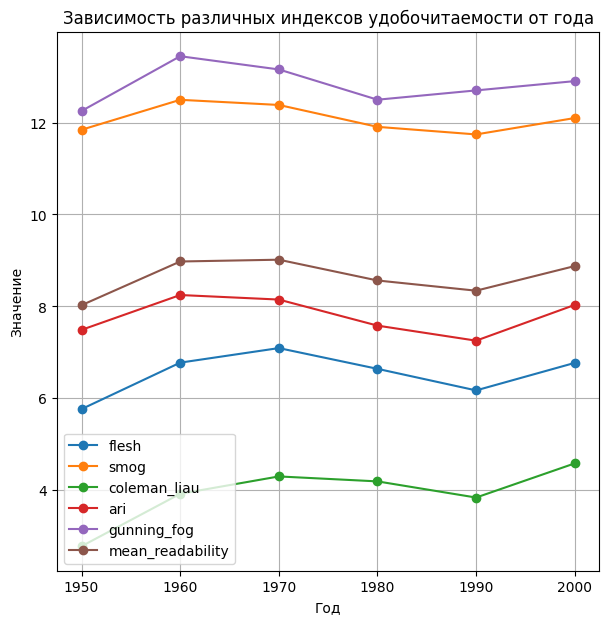

In [25]:
x = df_by_decade.index

plt.figure(figsize=(7, 7))

for column in df_by_decade.columns[0:]:
    y = df_by_decade[column]
    plt.plot(x, y, marker='o', label=column)

plt.title('Зависимость различных индексов удобочитаемости от года')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

## TTR

In [26]:
 def calculate_ttr(text):
    morph = pymorphy2.MorphAnalyzer()
    lemmatized_text = []
    words = text.split()
    for word in words:
        normalized_word = morph.parse(word.lower())[0].normal_form
        lemmatized_text.append(normalized_word)
    total_tokens = len(lemmatized_text)
    unique_tokens = len(set(lemmatized_text))
    ttr = unique_tokens / total_tokens
    return ttr

In [27]:
df['ttr'] = df['text'].apply(calculate_ttr)

C:\Users\x\AppData\Local\Temp\ipykernel_6700\3319024260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ttr'] = df['text'].apply(calculate_ttr)


In [28]:
df

,path,title,first_line,year,type,text,flesh,smog,coleman_liau,ari,gunning_fog,mean_readability,ttr
0,mozhno_i_ne_byt_poetom.txt,NaN,"Можно и не быть поэтом,",1976.0,text,"Можно и не быть поэтом,\nно нельзя терпеть, по...",8.730000,11.208143,5.652000,12.120000,12.000000,9.942029,1.000000
1,nosorog.txt,НОСОРОГ,Мы познали лишь предбанник.,2008.0,text,\n\nМы познали лишь предбанник.\nКраток срок.\...,6.243192,11.520995,3.864000,6.411657,13.327674,8.273504,0.796610
2,leto_oligarkha.txt,ЛЕТО ОЛИГАРХА,"Опаловый ""Линкольн""",2003.0,text,"\nОпаловый «Линкольн».\nПолмира огуляв,\nскажи...",4.399615,10.214890,3.471795,6.111538,11.000000,7.039568,0.824324
3,a_ty_menya_pomnish.txt,А ТЫ МЕНЯ ПОМНИШЬ?,Ты мне прозвонилась сквозь страшную полночь:,1998.0,text,\n\nТы мне прозвонилась сквозь страшную полноч...,4.446852,11.407656,2.042963,6.567333,11.622222,7.217405,0.637255
4,liturgija_let.txt,Литургия лет,"«Господь, помилуй меня,",1987.0,text,"\n\n«Господь, помилуй меня,\nГосподь, помилуй ...",4.300367,10.657889,1.822326,5.543383,9.363525,6.337498,0.706667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,otkrytie_ges.txt,ОТКРЫТИЕ ГЭС,Мы — противники тусклого.,1950.0,text,\n\nМы — противники тусклого.\nМы приучены к ш...,6.836812,13.205437,4.380870,8.508889,13.458937,9.278189,0.850575
413,v_gorakh.txt,В ГОРАХ,"Здесь пишется, как дышится, —",1950.0,text,"\n\nЗдесь пишется, как дышится, —\nВзволнованн...",9.339616,16.156166,6.336986,10.516849,19.538630,12.377650,0.689655
414,zagorskaya_lavra.txt,ЗАГОРСКАЯ ЛАВРА,Сопя носами сизыми,1950.0,text,\n\nСопя носами сизыми\nИ подоткнувши рясы —\n...,6.337021,11.855464,2.327660,8.015887,11.656738,8.038554,0.743363
415,zemlya.txt,ЗЕМЛЯ,Мы любим босыми,1950.0,text,"\n\nМы любим босыми\nСтупать по земле,\nПо мяг...",4.820999,11.557038,2.914186,8.684928,11.721477,7.939726,0.722222


In [29]:
print(df["ttr"].max(), df["ttr"].min(), df["ttr"].mean(), df["ttr"].median())

1.0 0.23222748815165878 0.7870158978232223 0.7821229050279329


[Text(0.5, 0, 'TTR'),
 Text(0.5, 1.0, 'Type-Token Ratio стихотворений А.А.Вознесенского')]

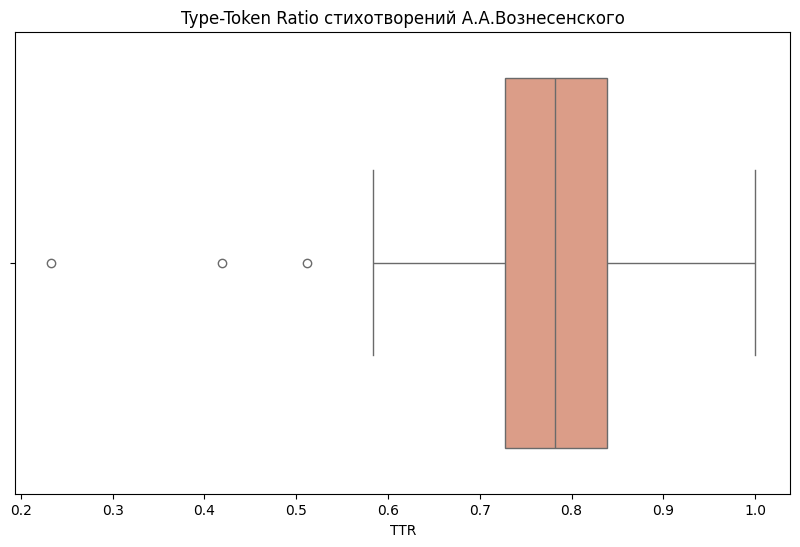

In [30]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(
    x= df["ttr"], 
    color='darksalmon').set(
    xlabel='TTR', 
    title = "Type-Token Ratio стихотворений А.А.Вознесенского")

In [31]:
df_ttr = df[["year", "ttr", "mean_readability"]]
df_ttr["year"] = df_ttr["year"] // 10 * 10
df_ttr = df_ttr.groupby("year").mean()
df_ttr 

C:\Users\x\AppData\Local\Temp\ipykernel_6700\1272208752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ttr["year"] = df_ttr["year"] // 10 * 10


,ttr,mean_readability
year,,
1950.0,0.787645,8.024694
1960.0,0.785771,8.975905
1970.0,0.775747,9.015099
1980.0,0.768411,8.562493
1990.0,0.804358,8.340142
2000.0,0.805629,8.876464


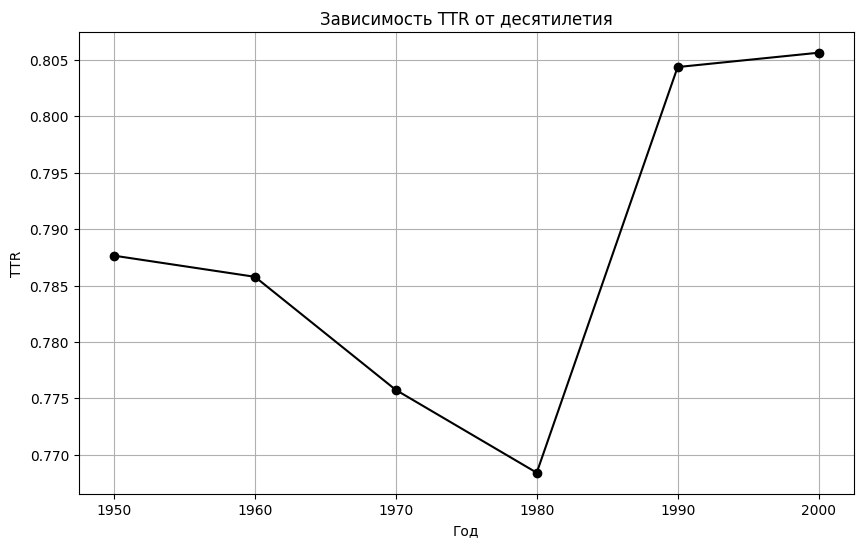

In [32]:
x = df_ttr.index
y = df_ttr["ttr"]

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='black', linestyle='-')

plt.title('Зависимость TTR от десятилетия')
plt.xlabel('Год')
plt.ylabel('TTR')
plt.grid(True)
plt.show()

In [33]:
df


,path,title,first_line,year,type,text,flesh,smog,coleman_liau,ari,gunning_fog,mean_readability,ttr
0,mozhno_i_ne_byt_poetom.txt,NaN,"Можно и не быть поэтом,",1976.0,text,"Можно и не быть поэтом,\nно нельзя терпеть, по...",8.730000,11.208143,5.652000,12.120000,12.000000,9.942029,1.000000
1,nosorog.txt,НОСОРОГ,Мы познали лишь предбанник.,2008.0,text,\n\nМы познали лишь предбанник.\nКраток срок.\...,6.243192,11.520995,3.864000,6.411657,13.327674,8.273504,0.796610
2,leto_oligarkha.txt,ЛЕТО ОЛИГАРХА,"Опаловый ""Линкольн""",2003.0,text,"\nОпаловый «Линкольн».\nПолмира огуляв,\nскажи...",4.399615,10.214890,3.471795,6.111538,11.000000,7.039568,0.824324
3,a_ty_menya_pomnish.txt,А ТЫ МЕНЯ ПОМНИШЬ?,Ты мне прозвонилась сквозь страшную полночь:,1998.0,text,\n\nТы мне прозвонилась сквозь страшную полноч...,4.446852,11.407656,2.042963,6.567333,11.622222,7.217405,0.637255
4,liturgija_let.txt,Литургия лет,"«Господь, помилуй меня,",1987.0,text,"\n\n«Господь, помилуй меня,\nГосподь, помилуй ...",4.300367,10.657889,1.822326,5.543383,9.363525,6.337498,0.706667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,otkrytie_ges.txt,ОТКРЫТИЕ ГЭС,Мы — противники тусклого.,1950.0,text,\n\nМы — противники тусклого.\nМы приучены к ш...,6.836812,13.205437,4.380870,8.508889,13.458937,9.278189,0.850575
413,v_gorakh.txt,В ГОРАХ,"Здесь пишется, как дышится, —",1950.0,text,"\n\nЗдесь пишется, как дышится, —\nВзволнованн...",9.339616,16.156166,6.336986,10.516849,19.538630,12.377650,0.689655
414,zagorskaya_lavra.txt,ЗАГОРСКАЯ ЛАВРА,Сопя носами сизыми,1950.0,text,\n\nСопя носами сизыми\nИ подоткнувши рясы —\n...,6.337021,11.855464,2.327660,8.015887,11.656738,8.038554,0.743363
415,zemlya.txt,ЗЕМЛЯ,Мы любим босыми,1950.0,text,"\n\nМы любим босыми\nСтупать по земле,\nПо мяг...",4.820999,11.557038,2.914186,8.684928,11.721477,7.939726,0.722222


In [34]:
df

,path,title,first_line,year,type,text,flesh,smog,coleman_liau,ari,gunning_fog,mean_readability,ttr
0,mozhno_i_ne_byt_poetom.txt,NaN,"Можно и не быть поэтом,",1976.0,text,"Можно и не быть поэтом,\nно нельзя терпеть, по...",8.730000,11.208143,5.652000,12.120000,12.000000,9.942029,1.000000
1,nosorog.txt,НОСОРОГ,Мы познали лишь предбанник.,2008.0,text,\n\nМы познали лишь предбанник.\nКраток срок.\...,6.243192,11.520995,3.864000,6.411657,13.327674,8.273504,0.796610
2,leto_oligarkha.txt,ЛЕТО ОЛИГАРХА,"Опаловый ""Линкольн""",2003.0,text,"\nОпаловый «Линкольн».\nПолмира огуляв,\nскажи...",4.399615,10.214890,3.471795,6.111538,11.000000,7.039568,0.824324
3,a_ty_menya_pomnish.txt,А ТЫ МЕНЯ ПОМНИШЬ?,Ты мне прозвонилась сквозь страшную полночь:,1998.0,text,\n\nТы мне прозвонилась сквозь страшную полноч...,4.446852,11.407656,2.042963,6.567333,11.622222,7.217405,0.637255
4,liturgija_let.txt,Литургия лет,"«Господь, помилуй меня,",1987.0,text,"\n\n«Господь, помилуй меня,\nГосподь, помилуй ...",4.300367,10.657889,1.822326,5.543383,9.363525,6.337498,0.706667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,otkrytie_ges.txt,ОТКРЫТИЕ ГЭС,Мы — противники тусклого.,1950.0,text,\n\nМы — противники тусклого.\nМы приучены к ш...,6.836812,13.205437,4.380870,8.508889,13.458937,9.278189,0.850575
413,v_gorakh.txt,В ГОРАХ,"Здесь пишется, как дышится, —",1950.0,text,"\n\nЗдесь пишется, как дышится, —\nВзволнованн...",9.339616,16.156166,6.336986,10.516849,19.538630,12.377650,0.689655
414,zagorskaya_lavra.txt,ЗАГОРСКАЯ ЛАВРА,Сопя носами сизыми,1950.0,text,\n\nСопя носами сизыми\nИ подоткнувши рясы —\n...,6.337021,11.855464,2.327660,8.015887,11.656738,8.038554,0.743363
415,zemlya.txt,ЗЕМЛЯ,Мы любим босыми,1950.0,text,"\n\nМы любим босыми\nСтупать по земле,\nПо мяг...",4.820999,11.557038,2.914186,8.684928,11.721477,7.939726,0.722222


In [35]:
df.to_excel("vozn_sample_complexity.xlsx")

In [42]:
from text_metrics import n_words, n_sentences, n_symbols, n_syllables, n_letters, lemmatized_no_pr_nouns, n_long_words

def FRE(text):
    return 206.836 - 1.52*(n_words(text) / n_sentences(text)) - 65.14*(n_syllables(text) / n_words(text))

In [43]:
df["fre"] = df['text'].apply(FRE) 

C:\Users\x\AppData\Local\Temp\ipykernel_6700\3735243638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fre"] = df['text'].apply(FRE)


In [44]:
df

,path,title,first_line,year,type,text,flesh,smog,coleman_liau,ari,gunning_fog,mean_readability,ttr,fre
0,mozhno_i_ne_byt_poetom.txt,NaN,"Можно и не быть поэтом,",1976.0,text,"Можно и не быть поэтом,\nно нельзя терпеть, по...",8.730000,11.208143,5.652000,12.120000,12.000000,9.942029,1.000000,85.240000
1,nosorog.txt,НОСОРОГ,Мы познали лишь предбанник.,2008.0,text,\n\nМы познали лишь предбанник.\nКраток срок.\...,6.243192,11.520995,3.864000,6.411657,13.327674,8.273504,0.796610,91.472774
2,leto_oligarkha.txt,ЛЕТО ОЛИГАРХА,"Опаловый ""Линкольн""",2003.0,text,"\nОпаловый «Линкольн».\nПолмира огуляв,\nскажи...",4.399615,10.214890,3.471795,6.111538,11.000000,7.039568,0.824324,101.233538
3,a_ty_menya_pomnish.txt,А ТЫ МЕНЯ ПОМНИШЬ?,Ты мне прозвонилась сквозь страшную полночь:,1998.0,text,\n\nТы мне прозвонилась сквозь страшную полноч...,4.446852,11.407656,2.042963,6.567333,11.622222,7.217405,0.637255,104.770370
4,liturgija_let.txt,Литургия лет,"«Господь, помилуй меня,",1987.0,text,"\n\n«Господь, помилуй меня,\nГосподь, помилуй ...",4.300367,10.657889,1.822326,5.543383,9.363525,6.337498,0.706667,104.196558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,otkrytie_ges.txt,ОТКРЫТИЕ ГЭС,Мы — противники тусклого.,1950.0,text,\n\nМы — противники тусклого.\nМы приучены к ш...,6.836812,13.205437,4.380870,8.508889,13.458937,9.278189,0.850575,91.119865
413,v_gorakh.txt,В ГОРАХ,"Здесь пишется, как дышится, —",1950.0,text,"\n\nЗдесь пишется, как дышится, —\nВзволнованн...",9.339616,16.156166,6.336986,10.516849,19.538630,12.377650,0.689655,78.456877
414,zagorskaya_lavra.txt,ЗАГОРСКАЯ ЛАВРА,Сопя носами сизыми,1950.0,text,\n\nСопя носами сизыми\nИ подоткнувши рясы —\n...,6.337021,11.855464,2.327660,8.015887,11.656738,8.038554,0.743363,95.707348
415,zemlya.txt,ЗЕМЛЯ,Мы любим босыми,1950.0,text,"\n\nМы любим босыми\nСтупать по земле,\nПо мяг...",4.820999,11.557038,2.914186,8.684928,11.721477,7.939726,0.722222,100.564153


C:\Users\x\AppData\Local\Temp\ipykernel_6700\545106088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fre["year"] = df_fre["year"] // 10 * 10


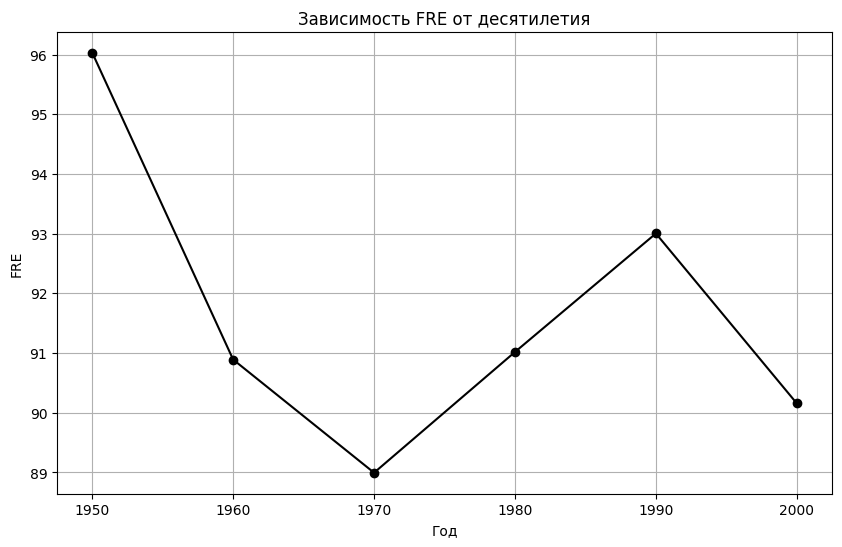

In [46]:
df_fre = df[["year", "fre"]]
df_fre["year"] = df_fre["year"] // 10 * 10
df_fre = df_fre.groupby("year").mean()

x = df_fre.index
y = df_fre["fre"]

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='black', linestyle='-')

plt.title('Зависимость FRE от десятилетия')
plt.xlabel('Год')
plt.ylabel('FRE')
plt.grid(True)
plt.show()

In [47]:
df["fre"].min()

41.317428571428565

In [48]:
df["fre"].mean()

91.51351980101063

[Text(0.5, 0, 'FRE'), Text(0.5, 1.0, 'FRE стихотворений А.А.Вознесенского')]

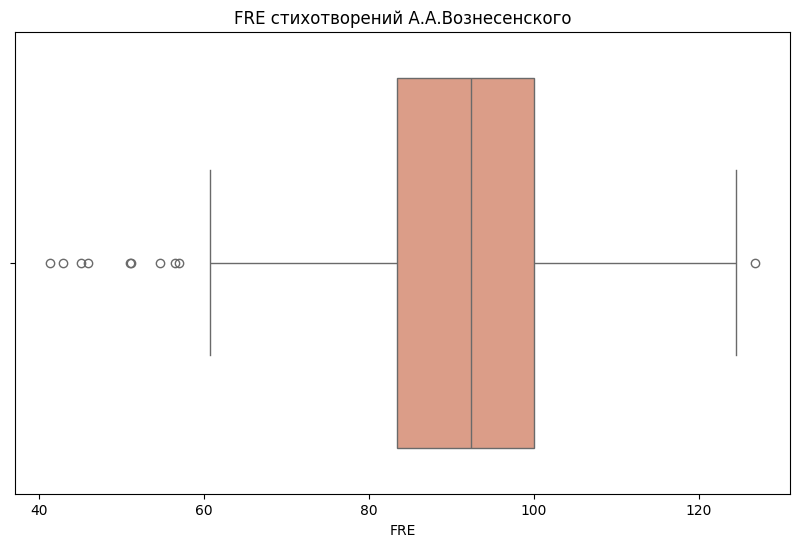

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x= df["fre"], 
    color='darksalmon').set(
    xlabel='FRE', 
    title = "FRE стихотворений А.А.Вознесенского")

In [40]:
from text_metrics import n_words, n_sentences, n_symbols, n_syllables, n_letters, lemmatized_no_pr_nouns, n_long_words

def n_3_syl(text):
    words = text.split()
    long_words = 0 #words with 3 syllables 
    for word in words:
        if n_syllables(word) == 3:
            long_words += 1
    return long_words

def FRE(text):
    return 206.836 - 1.52*(n_words(text) / n_sentences(text)) - 65.14*(n_syllables(text) / n_words(text))

def matskovsky(text):
    return 0.62*(n_words(text) / n_sentences(text)) + 0.123*(n_long_words(text)/n_words(text)) + 0.051

def oborneva(text):
    return 0.5*(n_words(text) / n_sentences(text)) + 8.4*(n_syllables(text) / n_words(text)) - 15.59

In [41]:
df["matskovsky"] = df['text'].apply(matskovsky) 
df["oborneva"] = df['text'].apply(oborneva) 

In [42]:
df

,path,title,first_line,year,type,text,matskovsky,oborneva
0,mozhno_i_ne_byt_poetom.txt,NaN,"Можно и не быть поэтом,",1976.0,text,"Можно и не быть поэтом,\nно нельзя терпеть, по...",12.463300,6.170000
1,nosorog.txt,НОСОРОГ,Мы познали лишь предбанник.,2008.0,text,\n\nМы познали лишь предбанник.\nКраток срок.\...,5.141430,1.766367
2,leto_oligarkha.txt,ЛЕТО ОЛИГАРХА,"Опаловый ""Линкольн""",2003.0,text,"\nОпаловый «Линкольн».\nПолмира огуляв,\nскажи...",4.726231,0.307692
3,a_ty_menya_pomnish.txt,А ТЫ МЕНЯ ПОМНИШЬ?,Ты мне прозвонилась сквозь страшную полночь:,1998.0,text,\n\nТы мне прозвонилась сквозь страшную полноч...,8.440133,1.675556
4,liturgija_let.txt,Литургия лет,"«Господь, помилуй меня,",1987.0,text,"\n\n«Господь, помилуй меня,\nГосподь, помилуй ...",7.085669,1.085569
...,...,...,...,...,...,...,...,...
412,otkrytie_ges.txt,ОТКРЫТИЕ ГЭС,Мы — противники тусклого.,1950.0,text,\n\nМы — противники тусклого.\nМы приучены к ш...,8.003170,3.216280
413,v_gorakh.txt,В ГОРАХ,"Здесь пишется, как дышится, —",1950.0,text,"\n\nЗдесь пишется, как дышится, —\nВзволнованн...",9.146808,5.403151
414,zagorskaya_lavra.txt,ЗАГОРСКАЯ ЛАВРА,Сопя носами сизыми,1950.0,text,\n\nСопя носами сизыми\nИ подоткнувши рясы —\n...,9.782652,3.502908
415,zemlya.txt,ЗЕМЛЯ,Мы любим босыми,1950.0,text,"\n\nМы любим босыми\nСтупать по земле,\nПо мяг...",6.350400,1.189754


In [96]:
df_by_decade = df[["year", "fre", "oborneva", "matskovsky"]]

In [97]:
df_by_decade['decade'] = df_by_decade['year'].apply(lambda x: x // 10 * 10)

C:\Users\x\AppData\Local\Temp\ipykernel_6700\1704438615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_decade['decade'] = df_by_decade['year'].apply(lambda x: x // 10 * 10)


In [98]:
df_by_decade = df_by_decade.drop("year", axis = 1)

In [99]:
df_by_decade = df_by_decade.groupby("decade").mean()

In [100]:
df_by_decade

,fre,oborneva,matskovsky
decade,,,
1950.0,96.032790,2.092420,7.000080
1960.0,90.890628,2.967140,7.433793
1970.0,88.994955,3.141346,7.290770
1980.0,91.018361,2.654149,6.827954
1990.0,93.003857,2.106738,6.235662
2000.0,90.156940,2.695412,6.687056


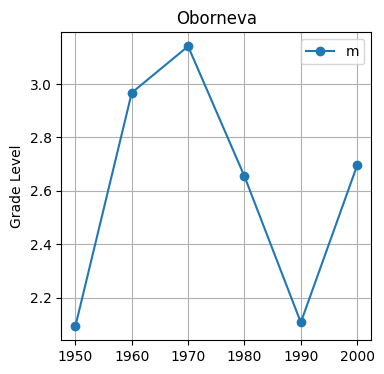

In [129]:
x = df_by_decade.index

plt.figure(figsize=(4, 4))

#for column in df_by_decade.columns[1:]:
y = df_by_decade["oborneva"]
plt.plot(x, y, marker='o', label=column)

plt.title('Oborneva')
plt.ylabel('Grade Level')
plt.legend()
plt.grid(True)
plt.show()

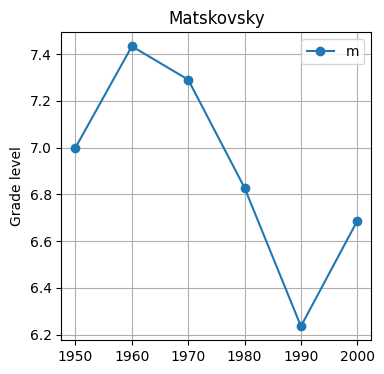

In [127]:
x = df_by_decade.index

plt.figure(figsize=(4, 4))

#for column in df_by_decade.columns[1:]:
y = df_by_decade["matskovsky"]
plt.plot(x, y, marker='o', label=column)

plt.title('Matskovsky')
plt.ylabel('Grade level')
plt.legend()
plt.grid(True)
plt.show()

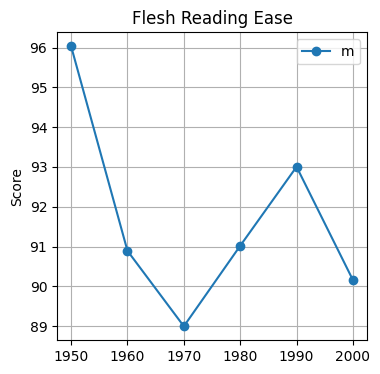

In [131]:
x = df_by_decade.index

plt.figure(figsize=(4, 4))

#for column in df_by_decade.columns[1:]:
y = df_by_decade["fre"]
plt.plot(x, y, marker='o', label=column)

plt.title('Flesh Reading Ease')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
df["matskovsky"].mean()

11.242575049035803

In [63]:
df["matskovsky"].min()

3.178

In [65]:
df["matskovsky"].max()

35.17395402298851

In [67]:
df["oborneva"].mean()

2.635503822198971

In [68]:
df["oborneva"].min()

-3.7030434782608683

In [69]:
df["oborneva"].max()

16.72823529411765

In [70]:
df["fre"].mean()

91.51351980101063

In [71]:
df["fre"].max()

126.75112422360252

In [72]:
df["fre"].min()

41.317428571428565